In [181]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.io
import scipy
import sklearn.neighbors
import umap
import seaborn as sns
import hdbscan
from matplotlib import pyplot as plt

In [14]:
# Changed the folder from data to /Users/jenniferthem/Masterthesis_Data
fc_matrix = np.load('/Users/jenniferthem/Masterthesis/core/data/FC_matrix.npy')
roi_labels_df = pd.read_pickle('/Users/jenniferthem/Masterthesis/core/data/roi_labels.pkl') # dataframe

In [219]:
# 15 colors
colors15 = ['#097E02', '#7988DF', '#38E1F5', '#1C0BEA', '#39374D', '#EC7BD9', '#560449', '#D192B8', '#F57A64', '#921701', '#A877EE', '#E2F337', '#BD11A1', '#89AB94','#ED1D0C']
# 18 colors
colors18 = ['#ED1D0C','#808000', '#FA8072', '#7DDCAC', '#097E02', '#7988DF', '#38E1F5', '#1C0BEA', '#39374D', '#EC7BD9', '#560449', '#D192B8', '#F57A64', '#921701', '#A877EE', '#E2F337', '#BD11A1', '#89AB94']
colors13 = ['#097E02', '#7988DF', '#38E1F5', '#1C0BEA', '#39374D', '#EC7BD9', '#560449', '#D192B8', '#F57A64', '#921701', '#A877EE', '#E2F337', '#BD11A1']
colors14 = ['#097E02', '#7988DF', '#38E1F5', '#1C0BEA', '#39374D', '#EC7BD9', '#560449', '#D192B8', '#F57A64', '#921701', '#A877EE', '#E2F337', '#BD11A1', '#89AB94']


In [206]:
customPalette = sns.set_palette(sns.color_palette(colors))
customPalette2 = sns.set_palette(sns.color_palette(colors2))

In [7]:
neighbor100_euclidean = umap.UMAP(
        n_neighbors=100,
        n_components=2,
        min_dist=0.0,
        metric='euclidean'
    ).fit_transform(fc_matrix)

/Users/jenniferthem/anaconda3/envs/py37/lib/python3.7/site-packages/numba/typed_passes.py:271: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../anaconda3/envs/py37/lib/python3.7/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  state.func_ir.loc))


<IPython.core.display.Javascript object>


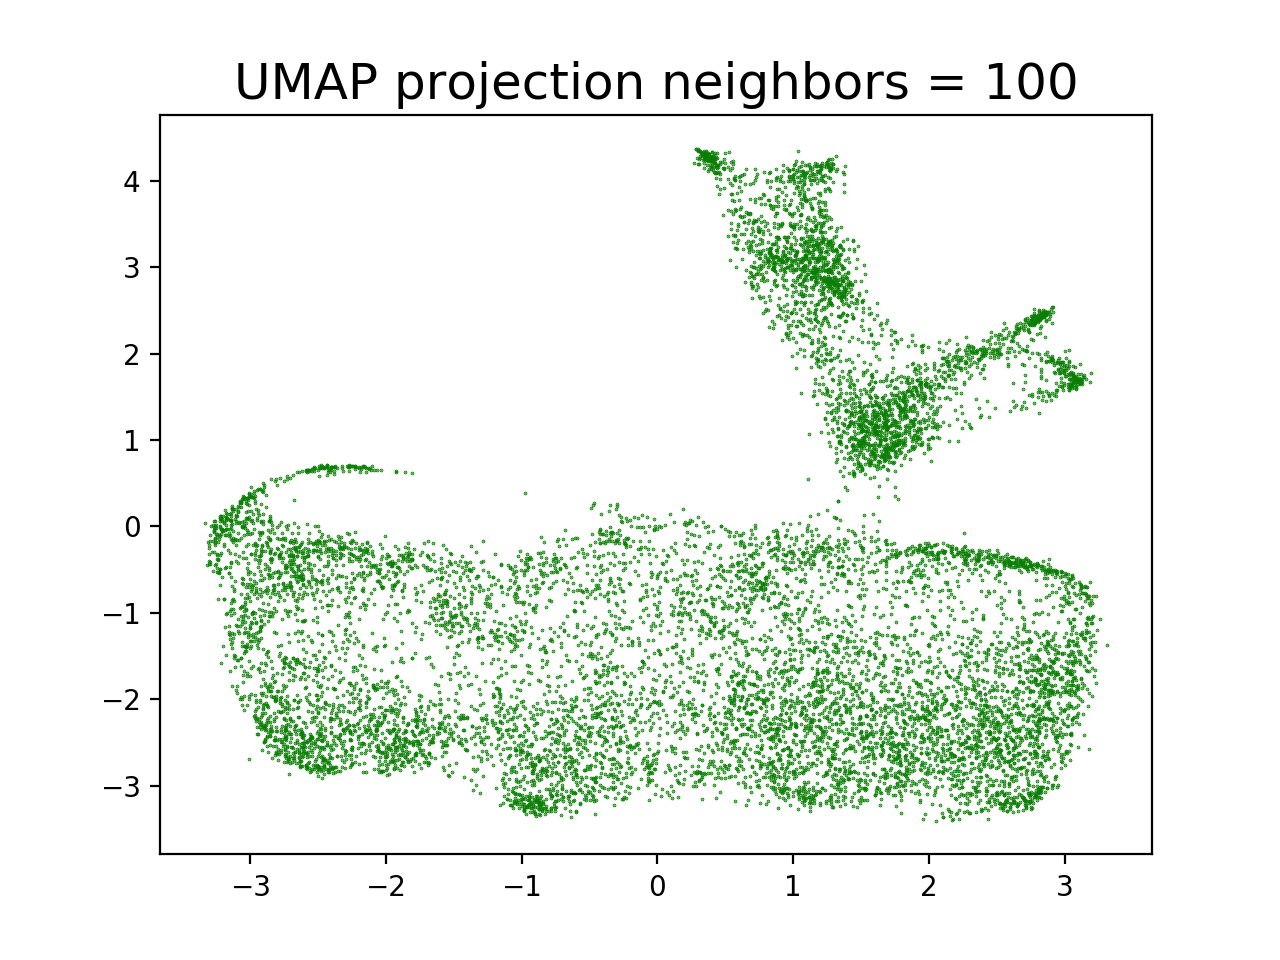

In [226]:
%matplotlib notebook
plt.scatter(neighbor100_euclidean[:, 0], neighbor100_euclidean[:, 1],
            s=0.1, cmap='Spectral');
plt.title('UMAP projection neighbors = 100', fontsize=18);

In [88]:
neighbor100_euclidean_df = pd.DataFrame(neighbor100_euclidean)
neighbor100_euclidean_roi_df = pd.concat([neighbor100_euclidean_df, roi_labels_df], axis = 1)
neighbor100_euclidean_roi_df.columns = ['x', 'y', 'ROI']
neighbor100_euclidean_roi_df.to_pickle('/Users/jenniferthem/Masterthesis/core/data/Euclidean100_labeled_ROI.pkl')

### Manhattan metric

In [10]:
neighbor100_manhattan = umap.UMAP(
        n_neighbors=100,
        n_components=2,
        min_dist=0.0,
        metric='manhattan'
    ).fit_transform(fc_matrix)

/Users/jenniferthem/anaconda3/envs/py37/lib/python3.7/site-packages/numba/typed_passes.py:271: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../anaconda3/envs/py37/lib/python3.7/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  state.func_ir.loc))


<IPython.core.display.Javascript object>


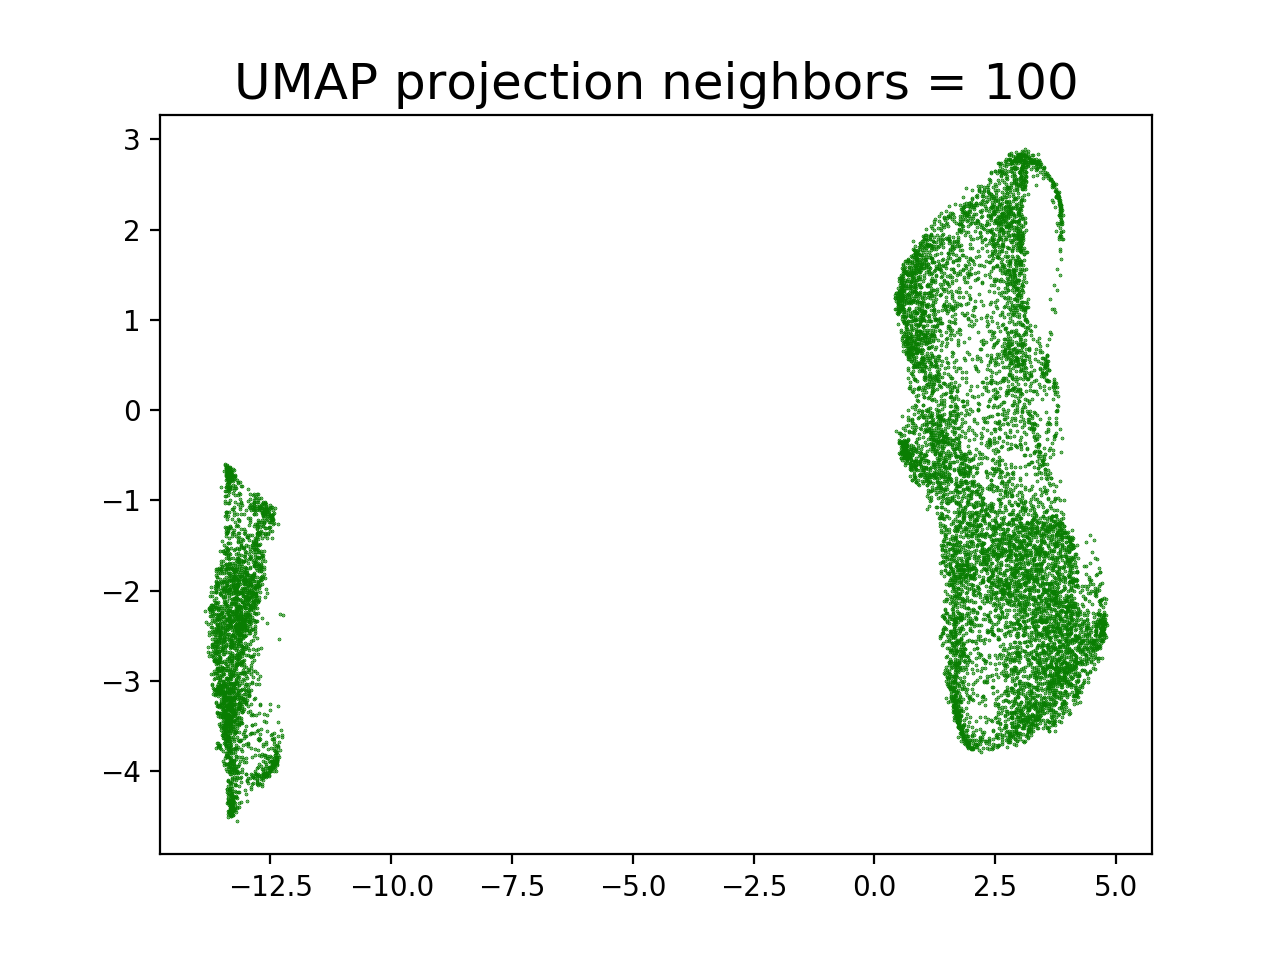

In [225]:
%matplotlib notebook
plt.scatter(neighbor100_manhattan[:, 0], neighbor100_manhattan[:, 1],
            s=0.1, cmap='Spectral');
plt.title('UMAP projection neighbors = 100', fontsize=18);

In [17]:
neighbor100_manhattan_df = pd.DataFrame(neighbor100_manhattan)
neighbor100_manhattan_roi_df = pd.concat([neighbor100_manhattan_df, roi_labels_df], axis = 1)
neighbor100_manhattan_roi_df.columns = ['x', 'y', 'ROI']
neighbor100_manhattan_roi_df.to_pickle('/Users/jenniferthem/Masterthesis/core/data/Manhatten_labeled_ROI.pkl')

### Cosine metric

In [12]:
neighbor100_cosine = umap.UMAP(
        n_neighbors=100,
        n_components=2,
        min_dist=0.0,
        metric='cosine'
    ).fit_transform(fc_matrix)

/Users/jenniferthem/anaconda3/envs/py37/lib/python3.7/site-packages/numba/typed_passes.py:271: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../anaconda3/envs/py37/lib/python3.7/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  state.func_ir.loc))
/Users/jenniferthem/anaconda3/envs/py37/lib/python3.7/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 2 separate connected components using meta-embedding (experimental)
  n_components


<IPython.core.display.Javascript object>


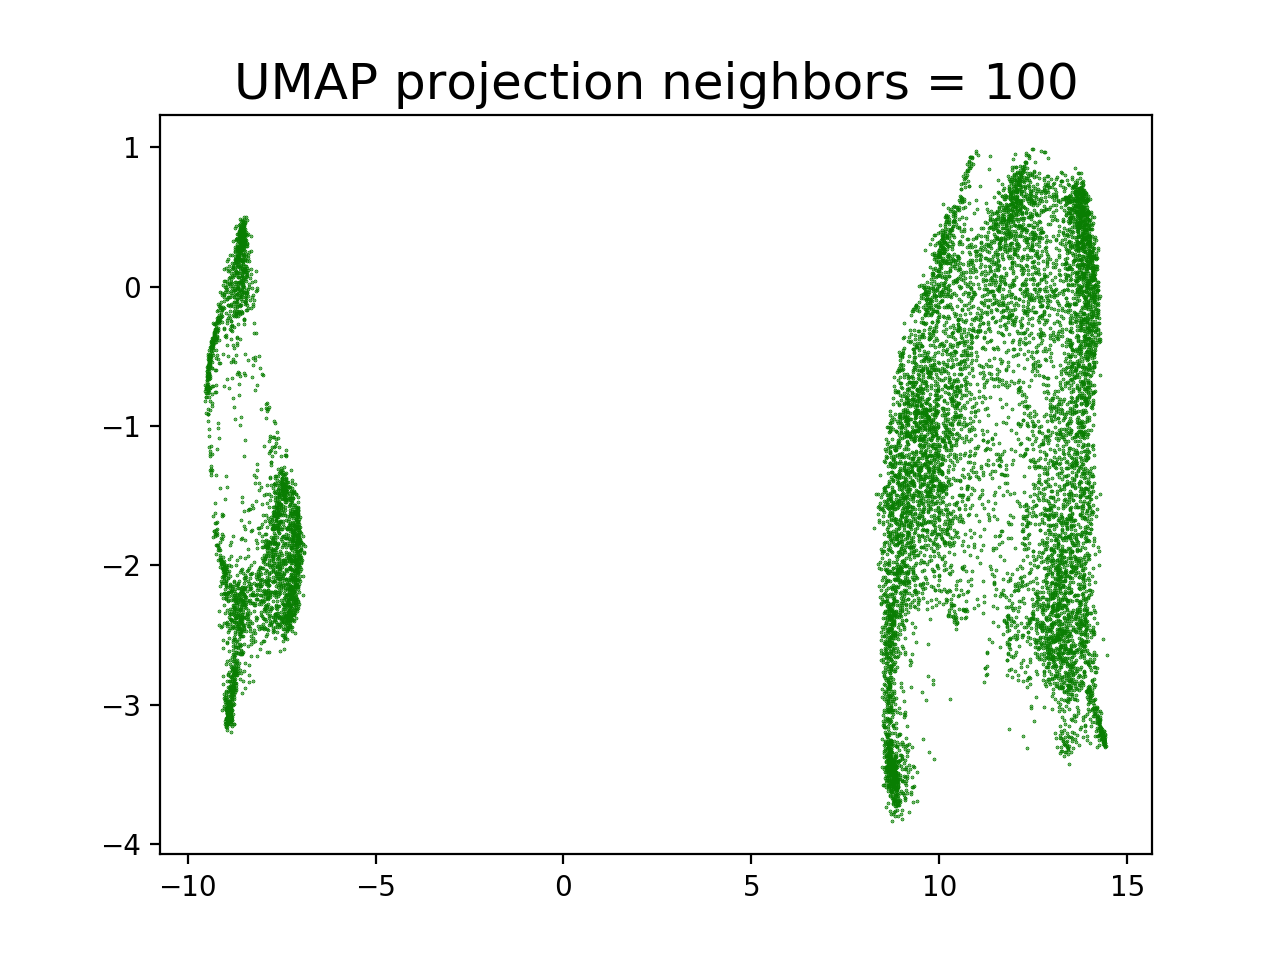

In [224]:
%matplotlib notebook
plt.scatter(neighbor100_cosine[:, 0], neighbor100_cosine[:, 1],
            s=0.1, cmap='Spectral');
plt.title('UMAP projection neighbors = 100', fontsize=18);

In [19]:
neighbor100_cosine_df = pd.DataFrame(neighbor100_cosine)
neighbor100_cosine_roi_df = pd.concat([neighbor100_cosine_df, roi_labels_df], axis =1)
neighbor100_cosine_roi_df.columns = ['x', 'y', 'ROI']
neighbor100_cosine_roi_df.to_pickle('/Users/jenniferthem/Masterthesis/core/data/Cosine_labeled_ROI.pkl')

## HDBScan

#### Euclidean metric

In [127]:
labels_euclidean = hdbscan.HDBSCAN(
    min_samples=5,
    min_cluster_size=200,
    cluster_selection_method='leaf'
).fit_predict(neighbor100_euclidean)

In [152]:
np.amax(labels_euclidean)

13

In [128]:
clustered_euclidean = (labels_euclidean >= 0)
labels_euclidean100_df = pd.DataFrame(labels_euclidean)

In [129]:
labels_euclidean

array([ 2, -1,  2, ...,  1,  1,  1])

In [130]:
(labels_euclidean >= 0)

array([ True, False,  True, ...,  True,  True,  True])

In [131]:
neighbor100_euclidean_hdbscan_labels_df = pd.concat([neighbor100_euclidean_df, labels_euclidean100_df], axis =1)
neighbor100_euclidean_hdbscan_labels_df.columns = ['x', 'y', 'class']
clu_roi_data_euclidean100 = pd.concat([neighbor100_euclidean_hdbscan_labels_df, roi_labels_df], axis=1)
clu_roi_data_euclidean100.columns = ['x', 'y', 'HDBScanLabel', 'ROI']
clu_roi_data_euclidean100.to_pickle('/Users/jenniferthem/Masterthesis/core/data/clustered_roi_data_euclidean100_df.pkl')

<IPython.core.display.Javascript object>


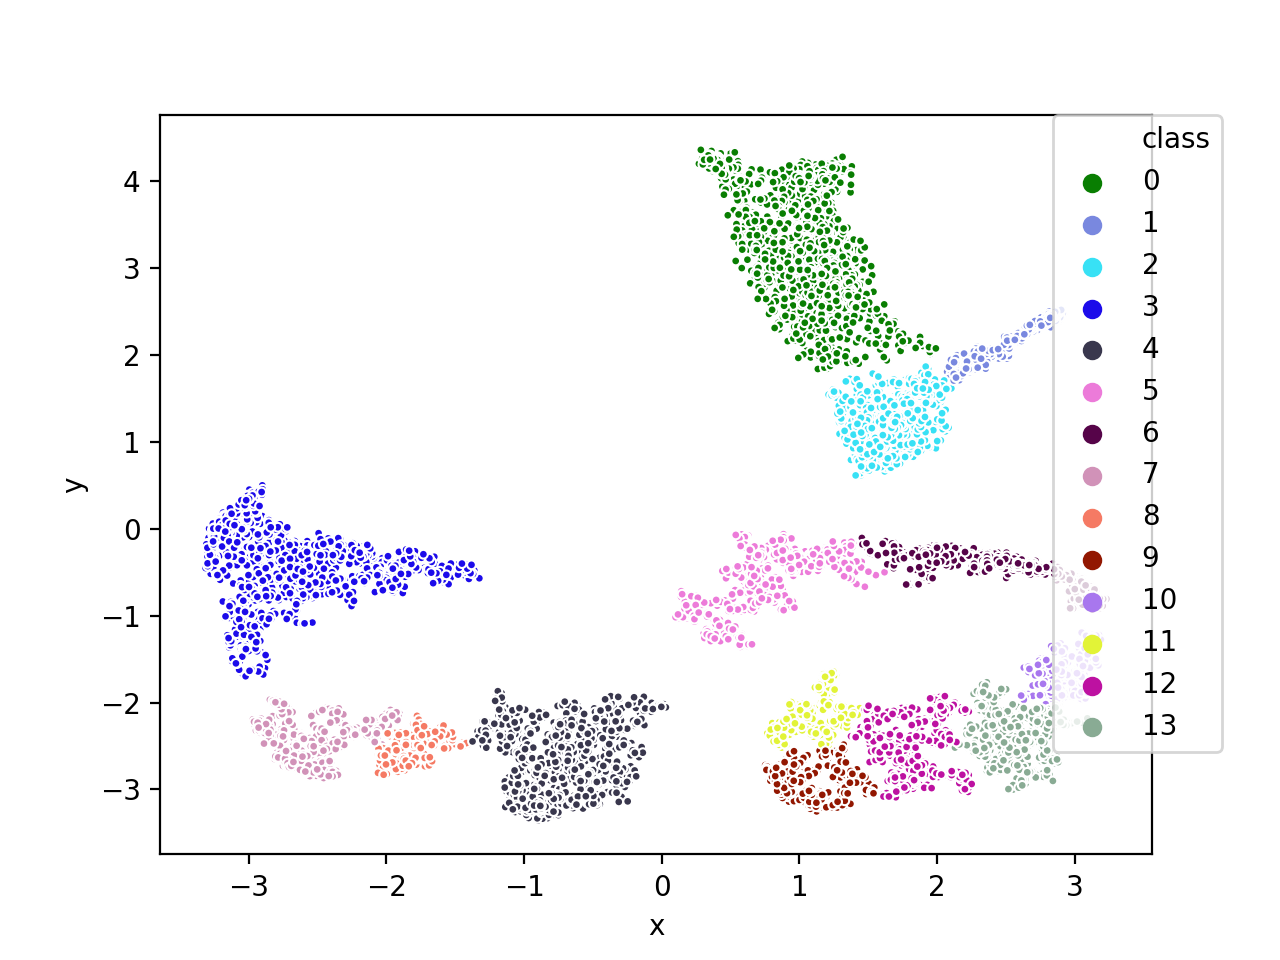

In [237]:
%matplotlib notebook
plot = sns.scatterplot(x="x", y="y", hue='class', data=neighbor100_euclidean_hdbscan_labels_df[clustered_euclidean], palette = colors14, legend = 'full', s=10)
plt.legend(bbox_to_anchor=(0.9, 1), loc=2, borderaxespad=0.)
plt.savefig('/Users/jenniferthem/Masterthesis/core/data/Plots/Euclidean100_hdbscan_labeledPlot.png')


In [136]:
# clusteres 62.95% of the data
np.sum(clustered_euclidean) / neighbor100_euclidean.shape[0]

0.6295142688778517

#### Manhattan metric

HDBScan labeling

In [70]:
labels_manhattan = hdbscan.HDBSCAN(
    min_samples=5,
    min_cluster_size=200,
    cluster_selection_method='leaf',
    metric='manhattan'
).fit_predict(neighbor100_manhattan)

In [71]:
clustered_manhattan = (labels_manhatten >= 0)

In [72]:
labels_manhattan_df = pd.DataFrame(labels_manhattan)

In [73]:
neighbor100_manhattan_hdbscan_labels_df = pd.concat([neighbor100_manhattan_df, labels_manhatten_df], axis =1)
neighbor100_manhattan_hdbscan_labels_df.columns = ['x', 'y', 'class']
clu_roi_data_manhattan = pd.concat([neighbor100_manhattan_hdbscan_labels_df, roi_labels_df], axis=1)
clu_roi_data_manhattan.columns = ['x', 'y', 'HDBScanLabel', 'ROI']
clu_roi_data_manhattan.to_pickle('/Users/jenniferthem/Masterthesis/core/data/clustered_roi_data_manhattan_df.pkl')

<IPython.core.display.Javascript object>


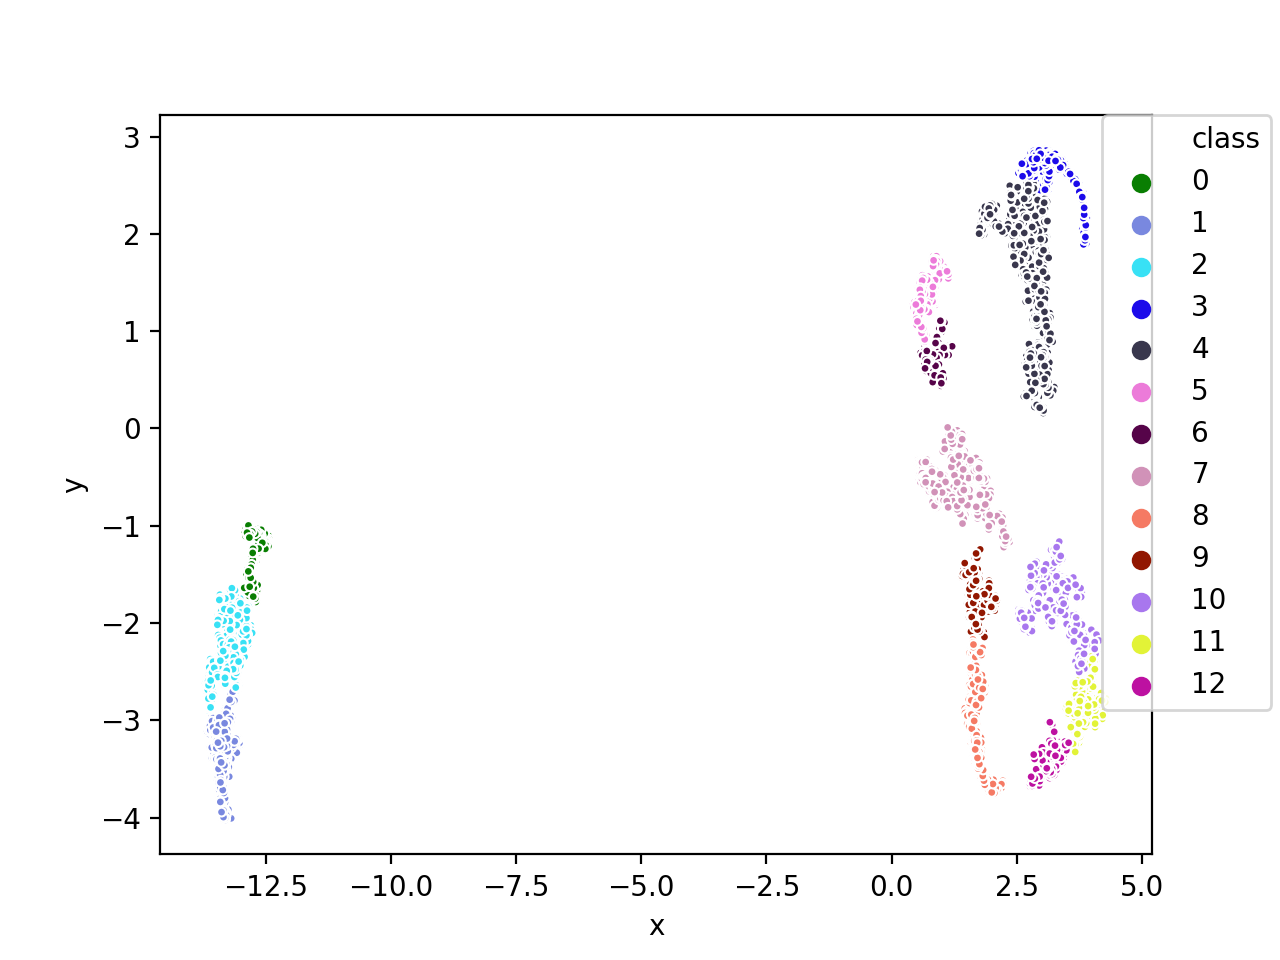

In [235]:
%matplotlib notebook
# presentation without the noise
sp = sns.scatterplot(x="x", y="y", hue='class', data=neighbor100_manhattan_hdbscan_labels_df[clustered_manhattan], legend='full', palette = colors13, s=10)
plt.legend(bbox_to_anchor=(0.95, 1), loc=2, borderaxespad=0.)
plt.savefig('/Users/jenniferthem/Masterthesis/core/data/Plots/Manhattan_hdbscan_labeledPlot.png')

<IPython.core.display.Javascript object>


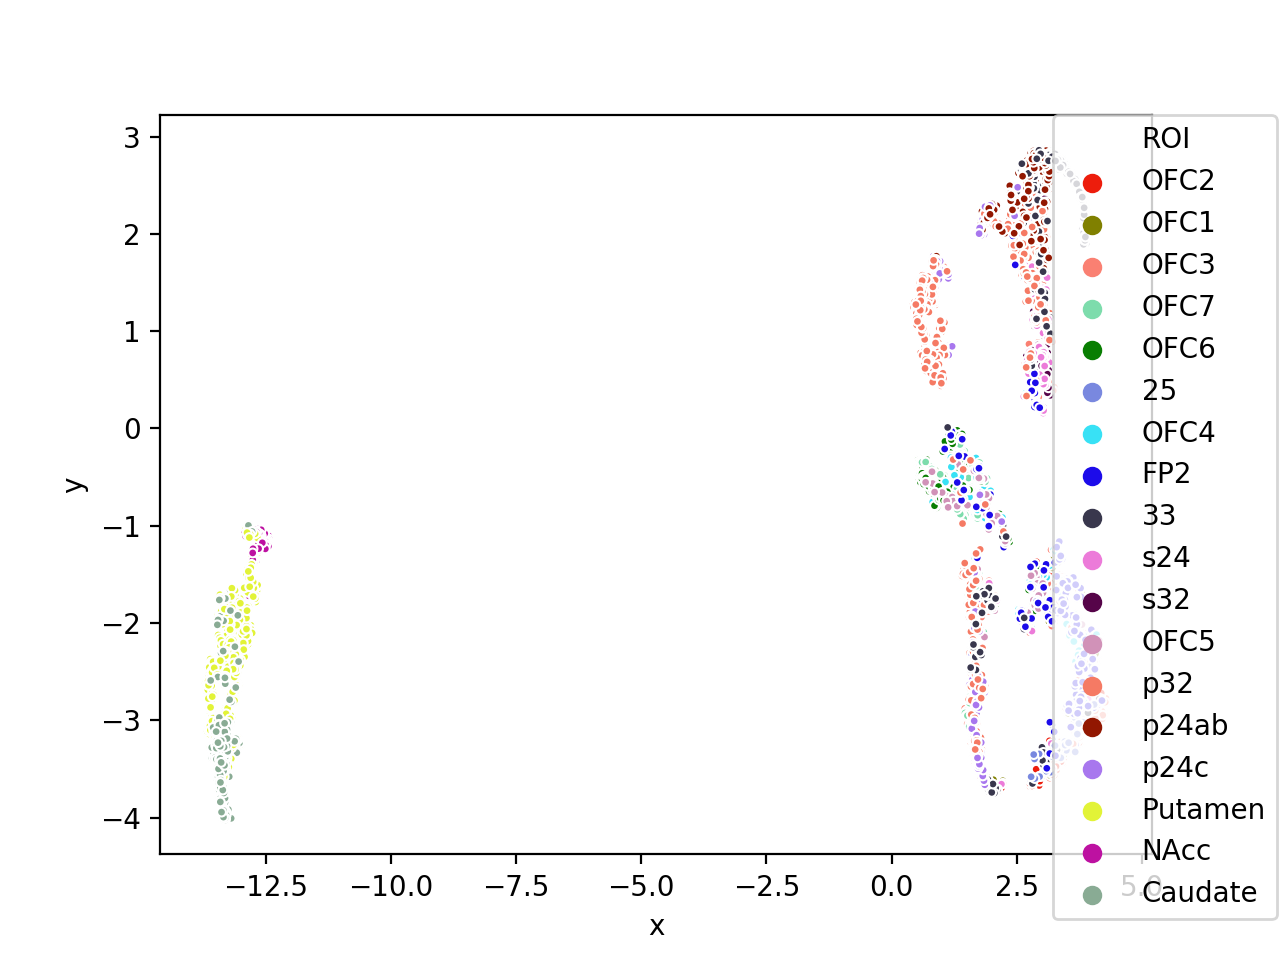

In [233]:
%matplotlib notebook
sp = sns.scatterplot(x="x", y="y", hue='ROI', data=neighbor100_manhattan_roi_df[clustered_manhattan],palette=colors18, s=10)
plt.legend(bbox_to_anchor=(0.9, 1), loc=2, borderaxespad=0.)
plt.savefig('/Users/jenniferthem/Masterthesis/core/data/Plots/Manhattan_roi_labeledPlot.png')

In [78]:
# clusteres 46.63% of the data
np.sum(clustered_manhattan) / neighbor100_manhattan.shape[0]

0.4663692229985689

#### Cosine metric

In [38]:
labels_cosine = hdbscan.HDBSCAN(
    min_samples=5,
    min_cluster_size=200,
    cluster_selection_method='leaf'
).fit_predict(neighbor100_cosine)

In [39]:
clustered_cosine = (labels_cosine >= 0)

In [40]:
labels_cosine_df = pd.DataFrame(labels_cosine)

In [203]:
neighbor100_cosine_hdbscan_labels_df = pd.concat([neighbor100_cosine_df, labels_cosine_df], axis =1)
neighbor100_cosine_hdbscan_labels_df.columns = ['x', 'y', 'label']
clu_roi_data_cosine = pd.concat([neighbor100_cosine_hdbscan_labels_df, roi_labels_df], axis=1)
clu_roi_data_cosine.columns = ['x', 'y', 'HDBScanLabel', 'ROI']
clu_roi_data_cosine
clu_roi_data_cosine.to_pickle('/Users/jenniferthem/Masterthesis/core/data/clustered_roi_data_cosine_df.pkl')

<IPython.core.display.Javascript object>


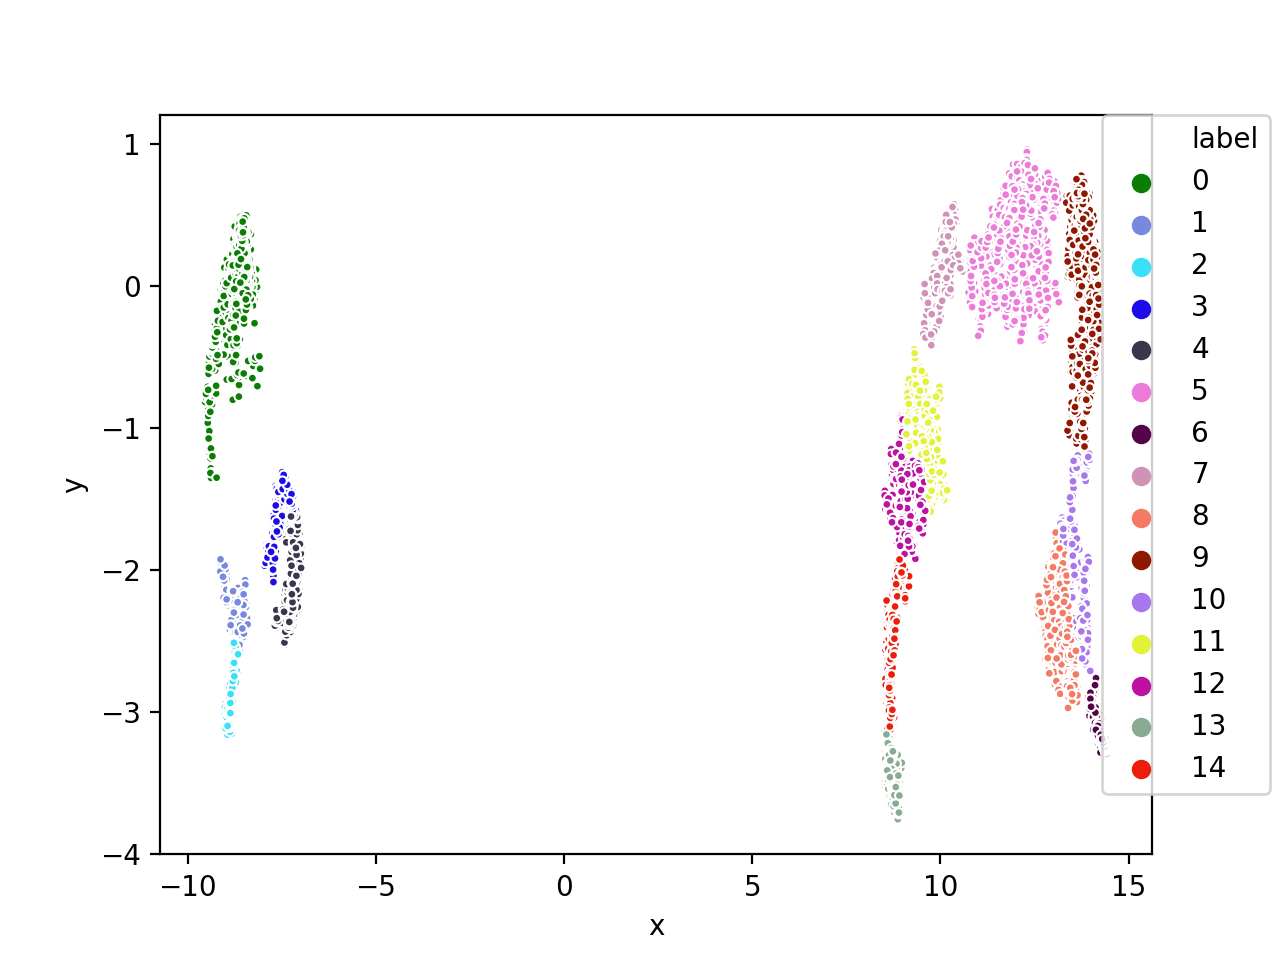

In [236]:
%matplotlib notebook
# presentation without the noise
sp = sns.scatterplot(x="x", y="y", hue='label', data=neighbor100_cosine_hdbscan_labels_df[clustered_cosine], palette = colors15, legend='full', s=10)
plt.legend(bbox_to_anchor=(0.95, 1), loc=2, borderaxespad=0.)
plt.savefig('/Users/jenniferthem/Masterthesis/core/data/Plots/Cosine_hdbscan_labeledPlot.png')

<IPython.core.display.Javascript object>


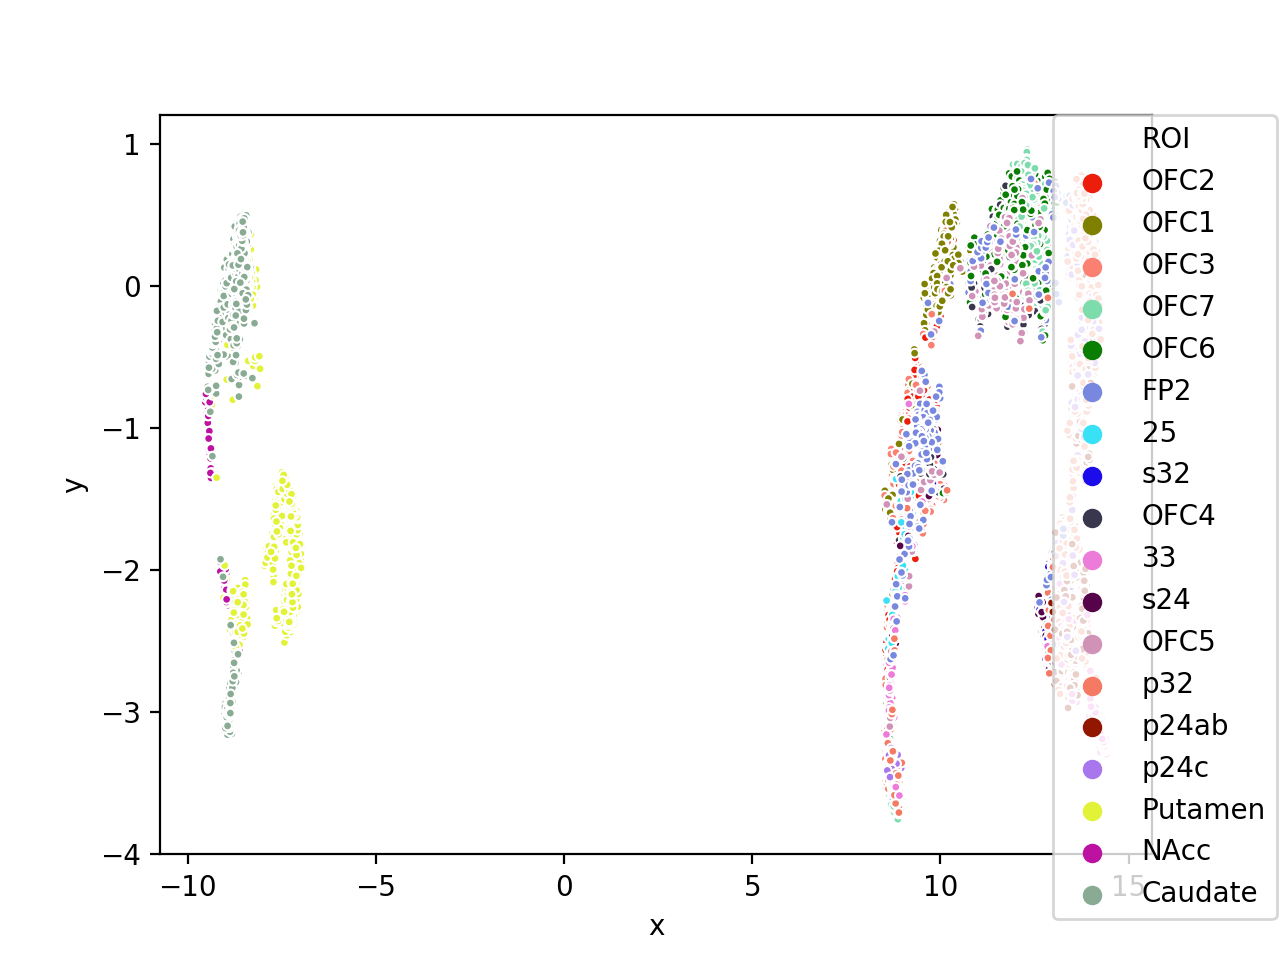

In [229]:
%matplotlib notebook
sp = sns.scatterplot(x="x", y="y", hue='ROI', data=neighbor100_cosine_roi_df[clustered_cosine], palette=colors18, s=10)
plt.legend(bbox_to_anchor=(0.9, 1), loc=2, borderaxespad=0.)
plt.savefig('/Users/jenniferthem/Masterthesis/core/data/Plots/Cosine_roi_labeledPlot.png')

In [68]:
# clusters 63.67% of the data
np.sum(clustered_cosine) / neighbor100_cosine.shape[0]

0.6366697533462413